In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from datetime import datetime
# matplotlib의 폰트를 Nanum 폰트로 지정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import gc
import pandas as pd
import numpy as np
from bokeh.plotting import figure, output_file, output_notebook, show

In [2]:
# 주피터 목차 생성
# pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install

In [3]:
# pip install pyarrow

In [4]:
# pip install fastparquet

In [5]:
data_dir_ = 'C:/Users/guswp/Desktop/project/data/'

In [6]:
# def csv_to_parquet(csv_path, save_name):
#     df = pd.read_csv(data_dir_ + csv_path)
#     df.to_parquet(data_dir_ + f'{save_name}.parquet')
#     del df
#     gc.collect()
#     print(save_name, 'Done.')

In [7]:
# csv_to_parquet('train.csv', 'train')
# csv_to_parquet('test.csv', 'test')

In [8]:
train = pd.read_parquet(data_dir_ + 'train.parquet')
test = pd.read_parquet(data_dir_ + 'test.parquet')

In [9]:
str_col = ['day_of_week','start_turn_restricted','end_turn_restricted']

In [10]:
train.drop(['road_in_use'],axis=1,inplace=True)
test.drop(['road_in_use'],axis=1,inplace=True)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

In [12]:
pd.set_option('display.max_columns', None)
train

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,1,107,-,0,0,50.0,0.0,0.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,20220331,목,2,2,107,-,0,0,80.0,0.0,43200.0,0.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


In [13]:
da_info = pd.read_csv(data_dir_+'data_info.csv')

In [14]:
da_info

,변수명,변수 설명
0,id,아이디
1,base_date,날짜
2,day_of_week,요일
3,base_hour,시간대
4,road_in_use,도로사용여부
5,lane_count,차로수
6,road_rating,도로등급
7,multi_linked,중용구간 여부
8,connect_code,연결로 코드
9,maximum_speed_limit,최고속도제한


# 함수

In [39]:
def boxplot(feature):
    plt.figure(figsize=(8,12))
    sns.boxplot(x=train[feature].to_numpy(),y=train['target'].to_numpy())
    plt.grid()
    plt.show()

In [40]:
def barplot(feature,estimators = np.mean):
    plt.figure(figsize=(8,12))
    sns.barplot(x=train[feature].to_numpy(),y=train['target'].to_numpy(),estimator=estimators)
    plt.grid()
    plt.show()

# EDA

## day_of_week (요일)

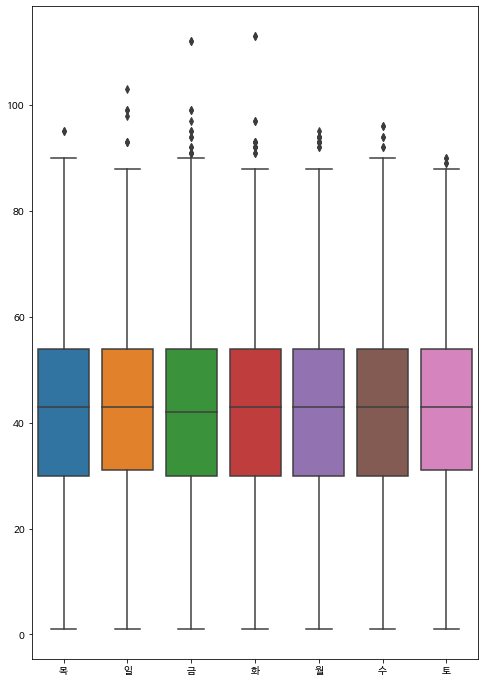

In [ ]:
boxplot('day_of_week')

In [ ]:
train[['day_of_week','target']].groupby('day_of_week').mean()

,target
day_of_week,
금,42.450328
목,42.768345
수,42.770372
월,42.761365
일,43.179300
토,42.894117
화,42.699198


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '평균 속도 분포')

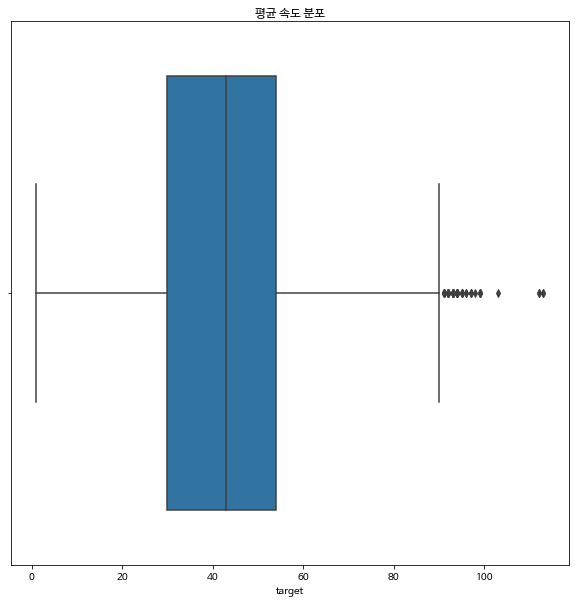

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(train['target'])
plt.title('평균 속도 분포')

- 요일자체는 평균 속도에 큰 영향을 주진 않는 것으로 보임
- 하지만, 전혀 영향이 없진 않을 듯
- 특정 요일에는 A시간대, 다른 요일에는 B시간대에 영향이 있지않을까...?

In [ ]:
# from bokeh.plotting import figure
# from bokeh.io import show, output_notebook
# import numpy as np

# p = figure(plot_width = 400,plot_height=300,
#           title= ' ' ,
#           x_axis_label = ' ', y_axis_label = ' ')
# p.vbar(train['day_of_week'].to_numpy(),
#        width = 1,
#        bottom= 0,
#        top = train['target'].to_numpy(),
#        color = 'blue')

# output_notebook()
# show(p)

## base_hour (시간대)

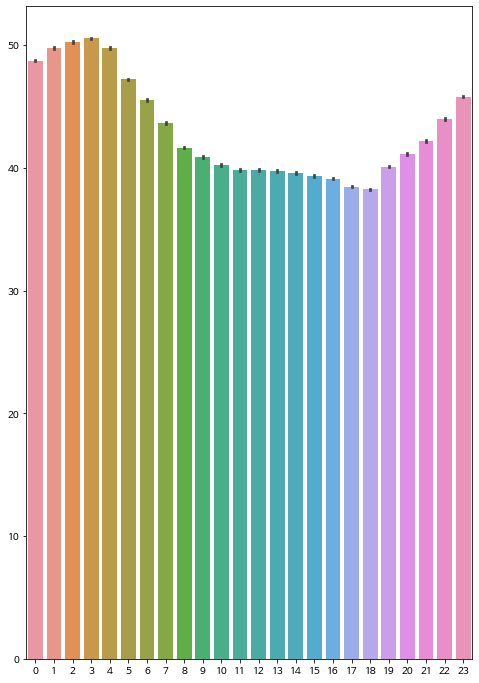

In [ ]:
barplot('base_hour')

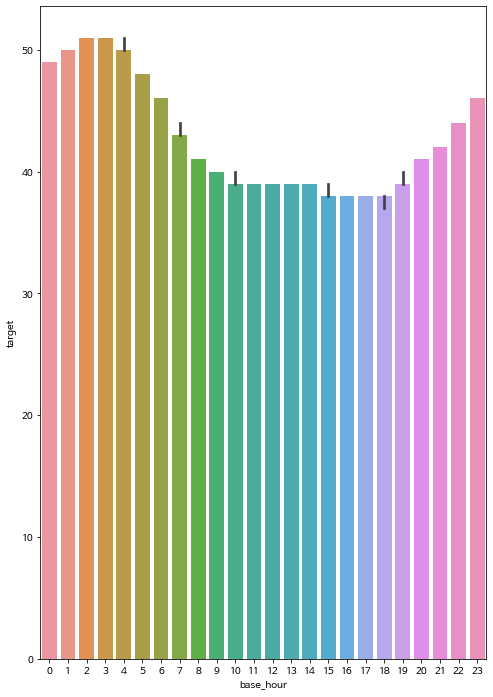

In [ ]:
barplot('base_hour',np.median)

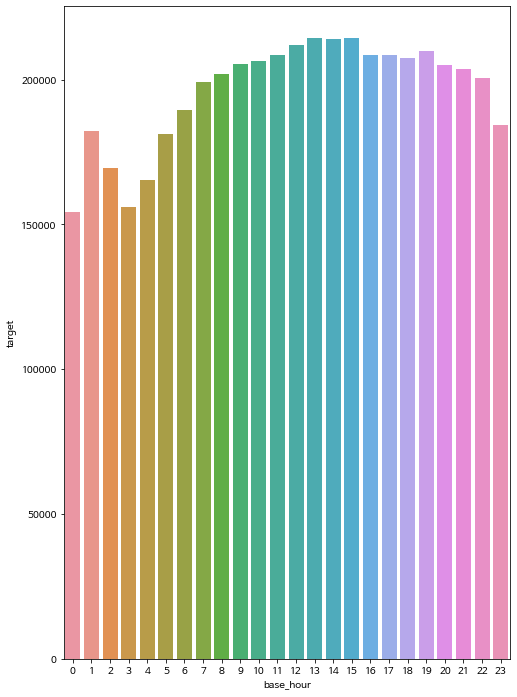

In [ ]:
barplot('base_hour',len)

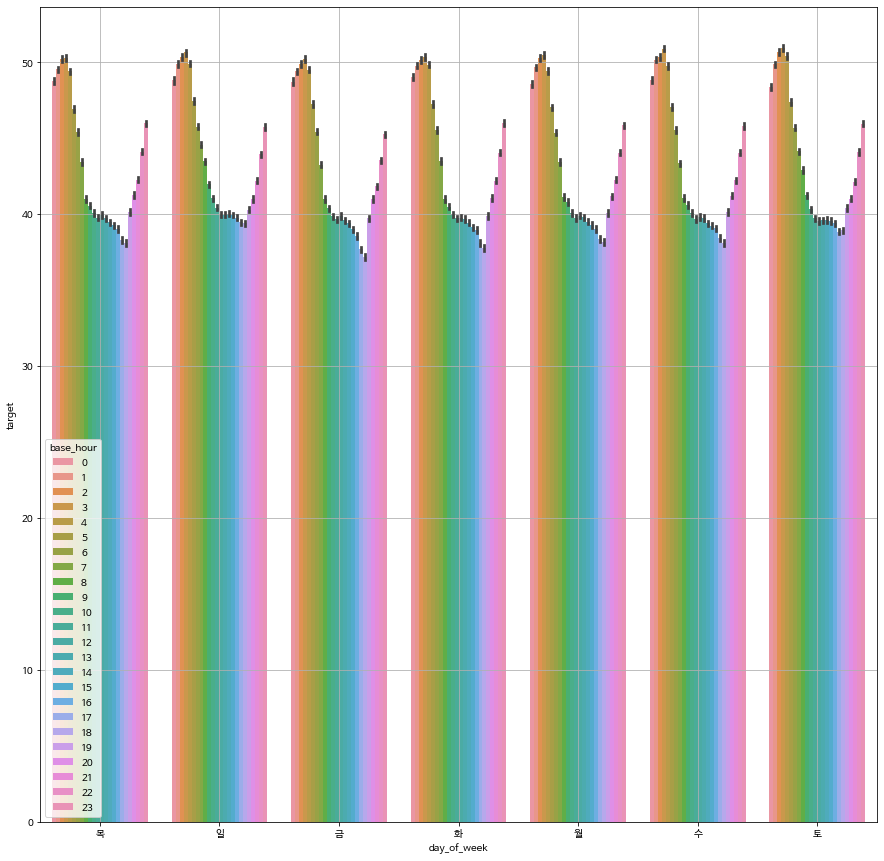

In [ ]:
plt.figure(figsize=(15,15))
sns.barplot(x='day_of_week',y='target',data = train, hue='base_hour')
plt.grid()
plt.show()

- 8 ~ 16를 활동시간이라고 봤을 때, 토일은 차량 속도가 비슷하지만 평일은 퇴근시간에 확 떨어지고 그 중에 금요일에는 떨어지는 폭이 더 큼
- 새벽 기준으로 주말에는 속도가 빠르지만 평일은 비교적 느림
---
-----> 평일 주말이나 월화수목, 금, 주말로 구분하는 변수 생성해도 될 듯



## lane_count (차로수)

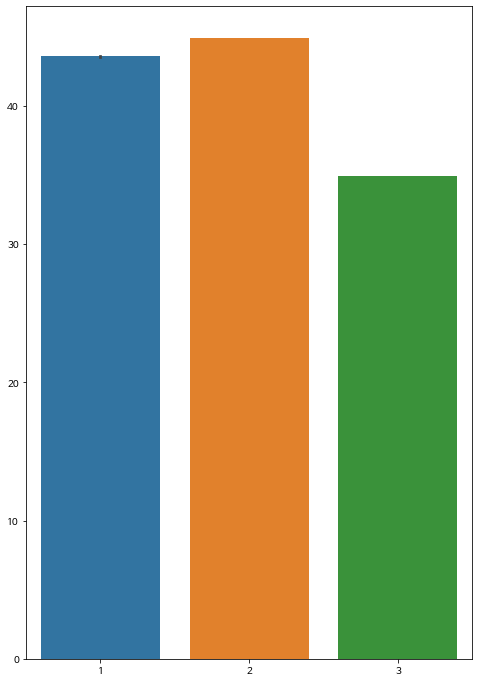

In [ ]:
barplot('lane_count')

- 차로수가 클수록 고속도로에 가까울테고 그러면 평균속도도 올라가지 않을까 했지만 2 1 3 순으로 차량속도가 빠름..
- 오히려 3차로 쪽으로 차량이 몰려서 평균 속도가 낮게 나오는 듯..

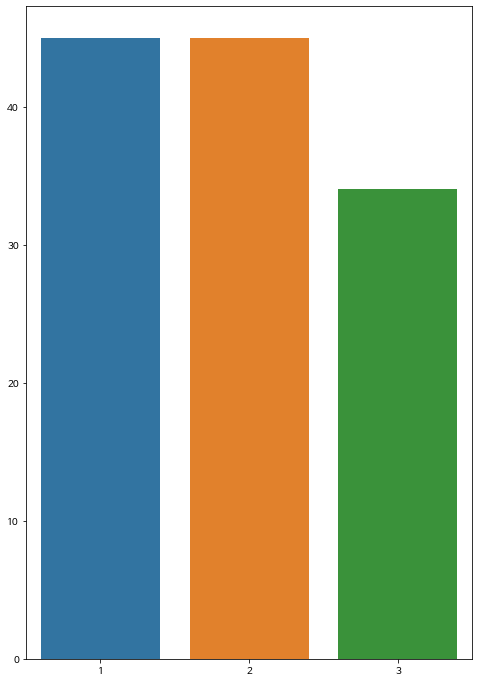

In [ ]:
barplot('lane_count',np.median)

## road_rating (도로등급)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


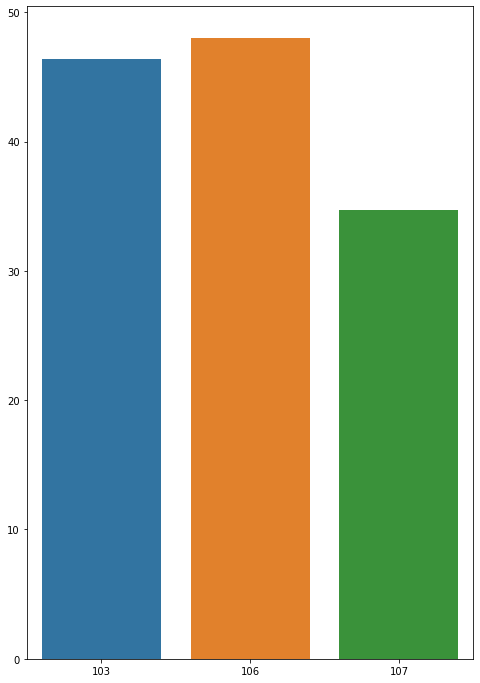

In [18]:
barplot('road_rating')

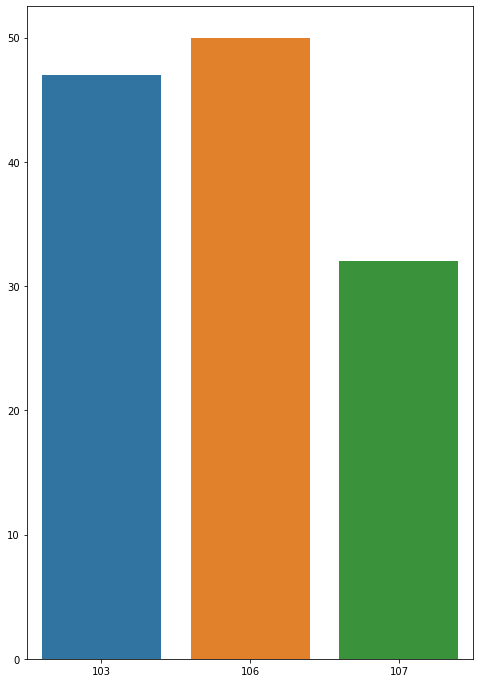

In [21]:
barplot('road_rating',np.median)

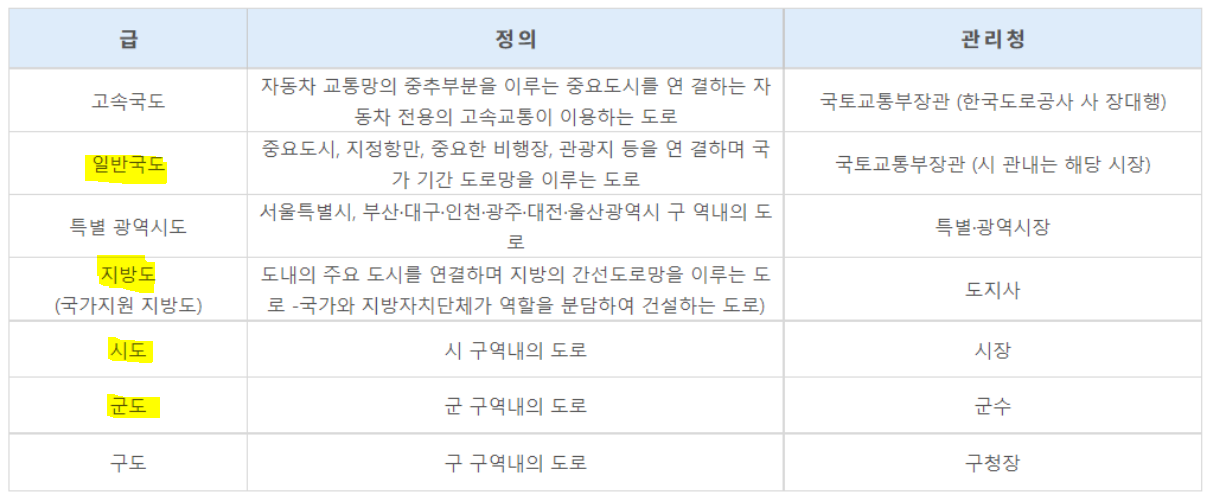

- 103: 일반국도
- 106: 지방도
- 107: 시/군도

In [20]:
train[['road_rating','target']].groupby('road_rating').count()

,target
road_rating,
103,2159511
106,959492
107,1582214


- 확실히 시, 군 내에 존재하는 도로는 교통 속도가 느림
- 일반국도와 지방도의 큰 차이는 안보임 --> 합칠지?그대로?
- 데이터 개수도 각각 많으므로 막대 그래프를 충분히 믿어도 될 듯

## multi_linked (중용구간 여부)

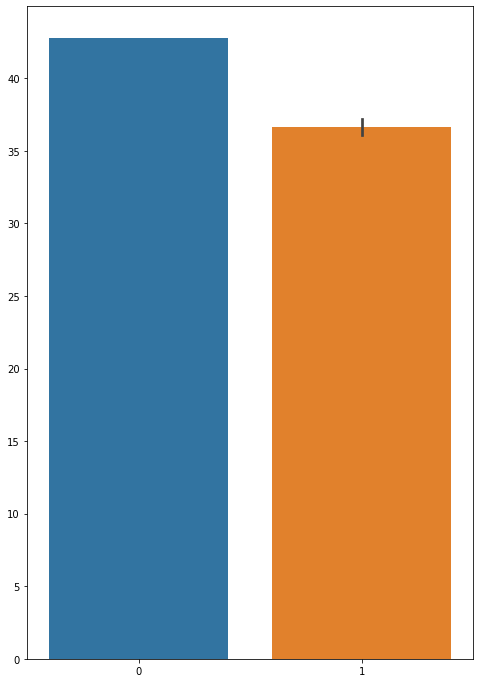

In [19]:
barplot('multi_linked')

In [28]:
print('중용구간인 도로 종류: ',*set(train.loc[train['multi_linked']==1,'road_name'].to_list()))

중용구간인 도로 종류:  남조로


In [32]:
train.loc[(train['road_name'] == '남조로') & (train['multi_linked'] == 1),:]

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
2715,TRAIN_0002715,20211212,일,22,1,107,남조로,1,0,50.0,0.0,0.0,0.0,3,의귀교,33.315308,126.714353,없음,의귀교,33.315111,126.714333,없음,48.0
2842,TRAIN_0002842,20220323,수,12,1,107,남조로,1,0,50.0,0.0,0.0,0.0,3,의귀교,33.315111,126.714333,없음,의귀교,33.315308,126.714353,없음,17.0
5672,TRAIN_0005672,20211029,금,18,1,107,남조로,1,0,50.0,0.0,0.0,0.0,3,의귀교,33.315111,126.714333,없음,의귀교,33.315308,126.714353,없음,13.0
6065,TRAIN_0006065,20210930,목,14,1,107,남조로,1,0,50.0,0.0,0.0,0.0,3,의귀교,33.315111,126.714333,없음,의귀교,33.315308,126.714353,없음,17.0
7171,TRAIN_0007171,20220211,금,12,1,107,남조로,1,0,50.0,0.0,0.0,0.0,3,의귀교,33.315308,126.714353,없음,의귀교,33.315111,126.714333,없음,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4693502,TRAIN_4693502,20220531,화,21,1,107,남조로,1,0,50.0,0.0,0.0,0.0,3,의귀교,33.315308,126.714353,없음,의귀교,33.315111,126.714333,없음,59.0
4693857,TRAIN_4693857,20211013,수,17,1,107,남조로,1,0,50.0,0.0,0.0,0.0,3,의귀교,33.315308,126.714353,없음,의귀교,33.315111,126.714333,없음,45.0
4694003,TRAIN_4694003,20211227,월,16,1,107,남조로,1,0,50.0,0.0,0.0,0.0,3,의귀교,33.315111,126.714333,없음,의귀교,33.315308,126.714353,없음,43.0
4694142,TRAIN_4694142,20210922,수,6,1,107,남조로,1,0,50.0,0.0,0.0,0.0,3,의귀교,33.315308,126.714353,없음,의귀교,33.315111,126.714333,없음,56.0


- 다른 특성을 못찾은 것일 수도 있지만, mulit_linked 1인 도로는 하나밖에 없을 뿐더러 의미도 없어보임
- 대시보드에 안보이는 데 왜 그런거지?
- 테스트 데이터에는 0밖에 없지만, 모델학습시 0,1을 부여하면 비교해서 더 학습을 잘할지??
- 일단 변수 제거 후보

## connect_code (연결로 코드)

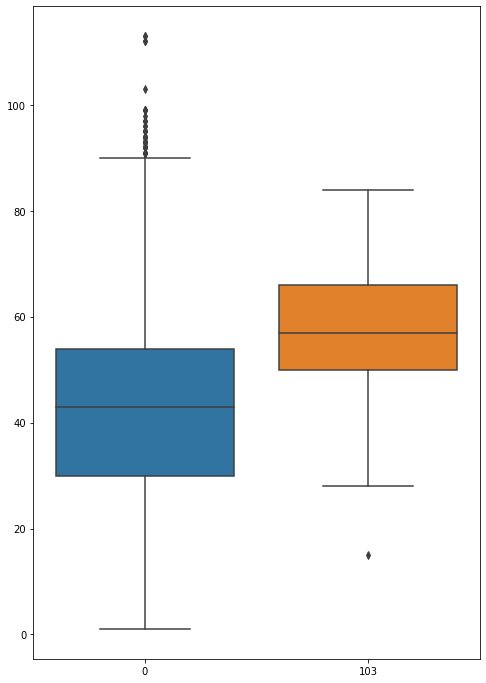

In [33]:
boxplot('connect_code')

In [34]:
train[['connect_code','target']].groupby('connect_code').count()

,target
connect_code,
0,4689075
103,12142


In [35]:
train.loc[train['connect_code']==103,:]

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
84,TRAIN_0000084,20220607,화,6,1,103,일반국도12호선,0,103,40.0,0.0,0.0,0.0,0,양계장,33.475446,126.388193,없음,구엄교,33.478037,126.388439,없음,74.0
380,TRAIN_0000380,20220205,토,6,1,103,일반국도12호선,0,103,40.0,0.0,0.0,0.0,0,양계장,33.475446,126.388193,없음,구엄교,33.478037,126.388439,없음,67.0
961,TRAIN_0000961,20220209,수,13,2,103,일반국도12호선,0,103,80.0,0.0,0.0,0.0,0,오돌또기,33.476123,126.382742,없음,양계장,33.475446,126.388193,없음,52.0
1107,TRAIN_0001107,20220322,화,9,2,103,일반국도12호선,0,103,80.0,0.0,0.0,0.0,0,오돌또기,33.476123,126.382742,없음,양계장,33.475446,126.388193,없음,51.0
1182,TRAIN_0001182,20220620,월,19,1,103,일반국도12호선,0,103,40.0,0.0,0.0,0.0,0,양계장,33.475446,126.388193,없음,구엄교,33.478037,126.388439,없음,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4699979,TRAIN_4699979,20211204,토,12,2,103,일반국도12호선,0,103,80.0,0.0,0.0,0.0,0,오돌또기,33.476123,126.382742,없음,양계장,33.475446,126.388193,없음,53.0
4700043,TRAIN_4700043,20220325,금,10,2,103,일반국도12호선,0,103,80.0,0.0,0.0,0.0,0,오돌또기,33.476123,126.382742,없음,양계장,33.475446,126.388193,없음,54.0
4700232,TRAIN_4700232,20211023,토,7,1,103,일반국도12호선,0,103,40.0,0.0,0.0,0.0,0,양계장,33.475446,126.388193,없음,구엄교,33.478037,126.388439,없음,67.0
4700581,TRAIN_4700581,20211011,월,7,2,103,일반국도12호선,0,103,80.0,0.0,0.0,0.0,0,오돌또기,33.476123,126.382742,없음,양계장,33.475446,126.388193,없음,55.0


- 테스트 데이터에는 0밖에 없지만, 모델학습시 0,1을 부여하면 비교해서 더 학습을 잘할지??
- 일단 변수 제거 후보

## maximum_speed_limit (최고속도제한)

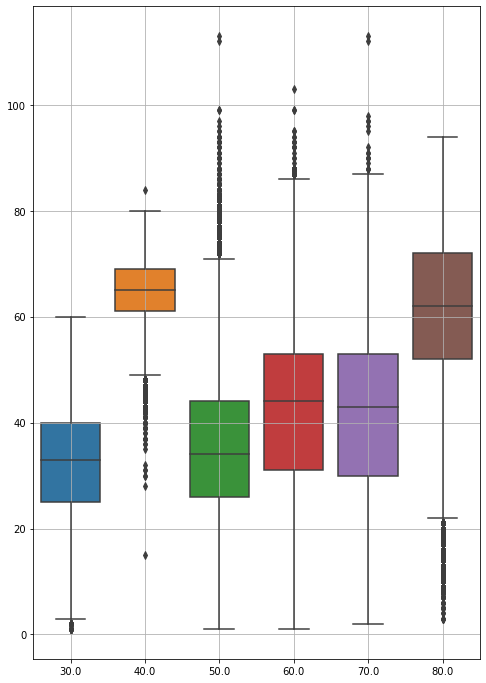

In [41]:
boxplot('maximum_speed_limit')

In [44]:
set(train.loc[train['maximum_speed_limit']==40,'road_name'].to_list())

{'일반국도12호선', '일반국도95호선'}

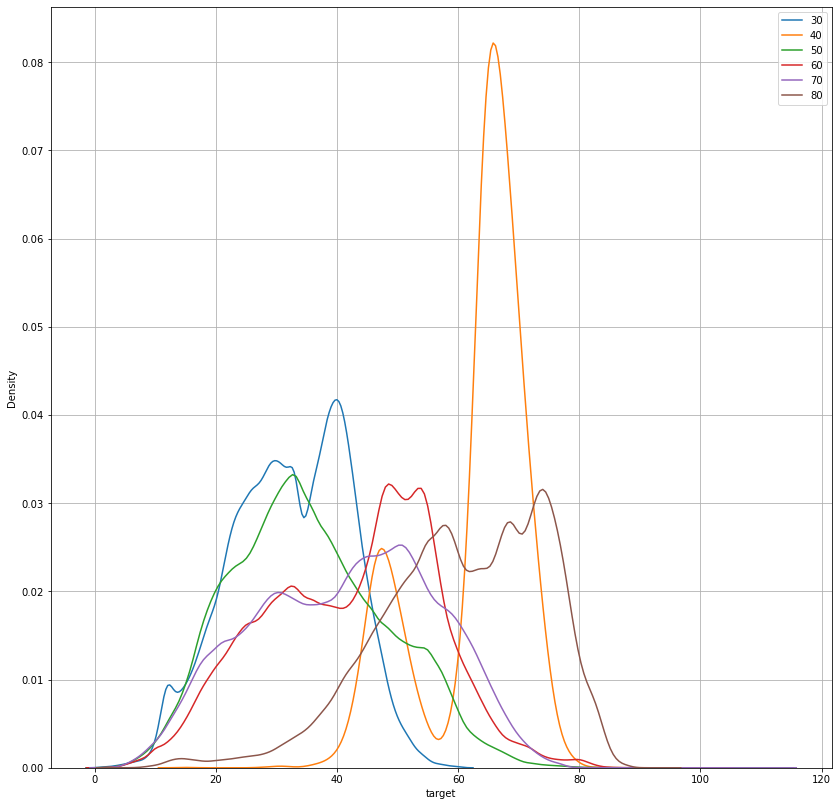

In [46]:
plt.figure(figsize=(14,14))
for i in range(30,90,10):
    sns.kdeplot(train.loc[train['maximum_speed_limit']==i,'target'],label=i)
plt.legend(loc='best')
plt.grid()
plt.show()

- 최고 속도 40제한일 때, 명확히 2그룹으로 나눠지는 걸 볼 수 있음
- '일반국도12호선', '일반국도95호선' 나눠서 분포 그려보자

C:\Users\guswp\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\guswp\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\guswp\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\guswp\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\guswp\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\guswp\anaconda3\lib

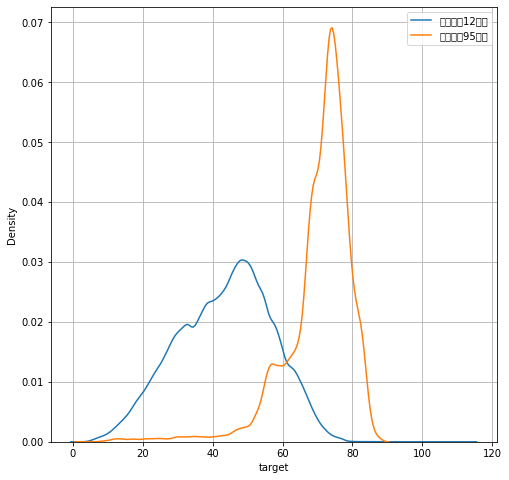

In [48]:
plt.figure(figsize=(8,8))
for i in ['일반국도12호선', '일반국도95호선']:
    sns.kdeplot(train.loc[train['road_name']==i,'target'],label=i)
plt.legend(loc='best')
plt.grid()
plt.show()

- '일반국도12호선', '일반국도95호선' 명확하게 구분되는 것을 확인
- 테스트 데이터에는 제한속도 40인 데이터는 없음
- 도로 구간별로 최고 속도 대비 평균속도 비율이 어떻게 되는지 확인해보자

### 도로 구간별로 **최고 속도**  대비 **평균속도** 비율 분석

In [16]:
train['max_avg_ratio'] = train['target'] / train['maximum_speed_limit']

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


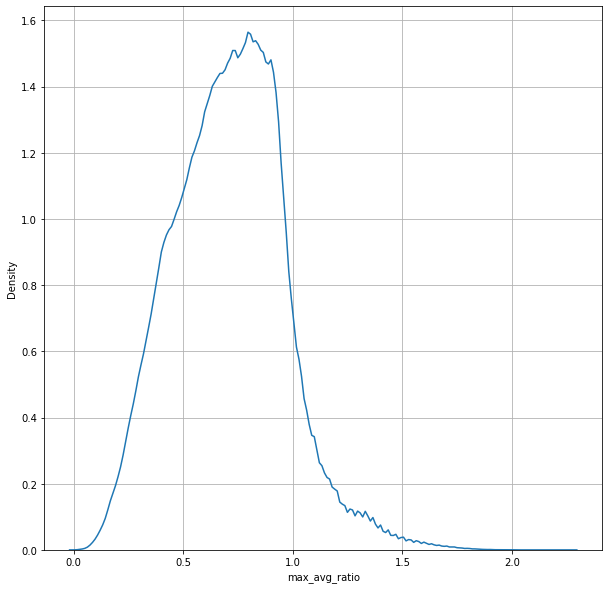

In [17]:
plt.figure(figsize=(10,10))
sns.kdeplot(train['max_avg_ratio'])
plt.grid()
plt.show()

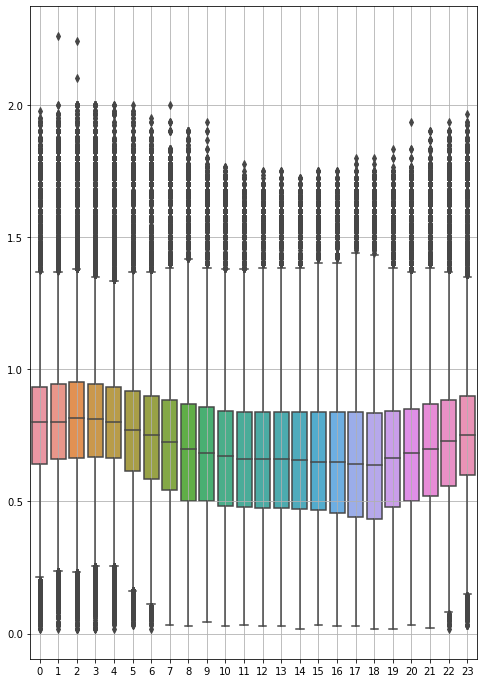

In [19]:
plt.figure(figsize=(8,12))
sns.boxplot(x=train['base_hour'].to_numpy(),y=train['max_avg_ratio'].to_numpy())
plt.grid()
plt.show()

In [21]:
train.loc[train['target']<=1,:]

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,max_avg_ratio
87757,TRAIN_0087757,20220606,월,21,1,103,일반국도16호선,0,0,50.0,0.0,0.0,0.0,0,양수장,33.361717,126.766958,없음,가시리,33.361308,126.766622,없음,1.0,0.020000
278873,TRAIN_0278873,20220327,일,3,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,청상어식당,33.244601,126.562080,없음,수복당,33.244871,126.564407,없음,1.0,0.020000
302311,TRAIN_0302311,20220326,토,3,2,107,-,0,0,60.0,0.0,0.0,0.0,0,나동,33.414175,126.269378,없음,가동,33.418412,126.268029,없음,1.0,0.016667
604833,TRAIN_0604833,20211021,목,14,2,107,새서귀로,0,0,60.0,0.0,0.0,0.0,0,시민공원,33.257130,126.510364,없음,난방시공협회,33.256449,126.511030,없음,1.0,0.016667
753526,TRAIN_0753526,20211106,토,23,1,106,지방도1120호선,0,0,30.0,0.0,0.0,0.0,0,월림삼거리,33.350504,126.256016,없음,월림삼거리,33.350271,126.256060,없음,1.0,0.033333
763638,TRAIN_0763638,20220327,일,3,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,서울이용원,33.246912,126.568186,없음,뉴본아파트,33.247388,126.568642,없음,1.0,0.020000
926662,TRAIN_0926662,20211101,월,3,2,107,중앙로,0,0,60.0,0.0,0.0,0.0,0,김약국,33.247607,126.561943,없음,청상어식당,33.244601,126.562080,없음,1.0,0.016667
939983,TRAIN_0939983,20210921,화,0,1,107,태평로,0,0,50.0,0.0,0.0,0.0,0,동홍새마을금고,33.250671,126.572366,없음,온누리부동산,33.254216,126.576890,없음,1.0,0.020000
977072,TRAIN_0977072,20220327,일,3,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서울이용원,33.246912,126.568186,없음,1.0,0.020000
1040223,TRAIN_1040223,20220513,금,2,2,107,-,0,0,60.0,0.0,0.0,0.0,0,원일공사,33.417801,126.264684,없음,농협창고,33.417450,126.262953,없음,1.0,0.016667


In [22]:
# 속도를 얼마나 낼 수 있을까에 대한거....(요일, 시간대, 도로별 특성....)
train[['start_node_name','end_node_name','max_avg_ratio']].groupby(['start_node_name','end_node_name']).mean()

max_avg_ratio
start_node_name end_node_name               
BYC             김약국                 0.471400
                정방수퍼                0.537955
CU서귀호근로점        서호교회                0.652446
KAL사거리          광양사거리               0.398716
가는질             우사                  0.917172
...                                      ...
회수입구            중문입구삼거리             0.824004
                회수사거리               0.654850
회천교차로           와흘교차로               0.892825
효례교             청송낚시                0.611753
흘천5교            그랜드호텔사거             0.392405

[808 rows x 1 columns]

## weight_restricted (통과제한하중)

## hight_restricted (통과제한높이)

## road_type (도로유형)

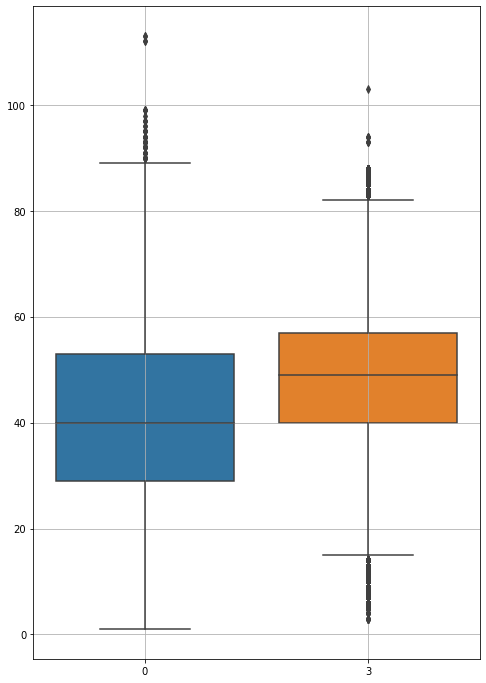

In [50]:
boxplot('road_type')

- 0: 일반도로
- 3: 교량(다리 위에 있는 도로)

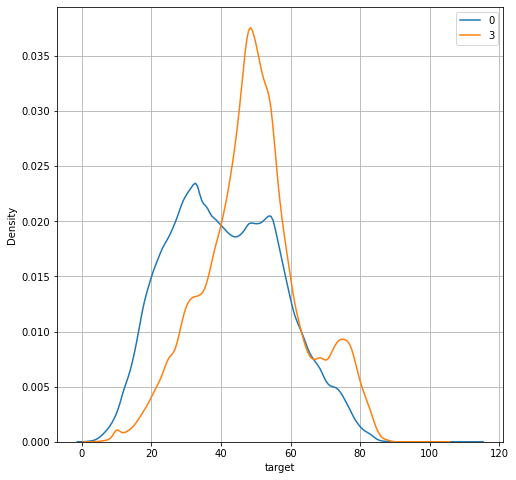

In [51]:
plt.figure(figsize=(8,8))
for i in [0,3]:
    sns.kdeplot(train.loc[train['road_type']==i,'target'],label=i)
plt.legend(loc='best')
plt.grid()
plt.show()

In [54]:
set(train.loc[(train['road_type']==3) & (train['target']>63),'road_name'].to_list())

{'-',
 '남조로',
 '번영로',
 '연북2교',
 '일반국도11호선',
 '일반국도12호선',
 '일반국도16호선',
 '일반국도95호선',
 '지방도1112호선',
 '지방도1115호선',
 '지방도1118호선',
 '지방도1119호선',
 '지방도1132호선',
 '지방도97호선'}

- 일반도로와 교량은 차이가 있어보임

## start_turn_restricted (시작 지점의 회전제한 유무)

## end_turn_restricted (도착지점의 회전제한 유무)

## road_name (도로명)

## start_node_name (시작지점명)

In [ ]:
## 같은 링크별로 데이터 2개 존재(A->B, B->A)

## end_node_name (도착지점명)

## vehicle_restricted (통과제한차량)

- 같은 도로라도 구간별로 나눠져있음

In [ ]:
train.head()

,id,base_date,day_of_week,base_hour,road_in_use,lane_count,road_rating,road_name,multi_linked,connect_code,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,0,1,106,지방도1112호선,0,0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,0,2,103,일반국도11호선,0,0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,0,2,103,일반국도16호선,0,0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,0,2,107,태평로,0,0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,0,2,103,일반국도12호선,0,0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


In [ ]:
## 파생변수 토일 제외하고 크리스마스/ 설날 이런날 체크


In [ ]:
train[['maximum_speed_limit','target']].groupby('maximum_speed_limit').median()

,target
maximum_speed_limit,
30.0,33.0
40.0,65.0
50.0,34.0
60.0,44.0
70.0,43.0
80.0,62.0


In [ ]:
train[['maximum_speed_limit','target']].groupby('maximum_speed_limit').count()

,target
maximum_speed_limit,
30.0,229761
40.0,6790
50.0,1103682
60.0,1665573
70.0,995077
80.0,700334


In [ ]:
print('도로이름 누락된 데이터 비율: ',train.loc[train['road_name'] == '-'].shape[0]/ train.shape[0])

도로이름 누락된 데이터 비율:  0.1211309752347105


In [ ]:
set(train['road_name'].to_list())

{'-',
 '경찰로',
 '고평교',
 '관광단지1로',
 '관광단지2로',
 '관광단지로',
 '관덕로',
 '권학로',
 '남조로',
 '동문로',
 '동부관광도로',
 '동홍로',
 '번영로',
 '산서로',
 '삼무로',
 '삼봉로',
 '삼성로',
 '새서귀로',
 '서사로',
 '수영장길',
 '시민광장로',
 '시청로',
 '신광로',
 '신대로',
 '신산로',
 '아봉로',
 '애원로',
 '애조로',
 '어시천교',
 '연동로',
 '연북2교',
 '연북로',
 '연삼로',
 '외도천교',
 '일반국도11호선',
 '일반국도12호선',
 '일반국도16호선',
 '일반국도95호선',
 '일반국도99호선',
 '일주동로',
 '임항로',
 '제2거로교',
 '중문로',
 '중산간서로',
 '중앙로',
 '중정로',
 '지방도1112호선',
 '지방도1115호선',
 '지방도1116호선',
 '지방도1117호선',
 '지방도1118호선',
 '지방도1119호선',
 '지방도1120호선',
 '지방도1132호선',
 '지방도1136호선',
 '지방도97호선',
 '첨단로',
 '태평로',
 '한천로',
 '호근로',
 '호서중앙로'}